In [174]:
from dependencies.NN import *
from dependencies.LTL import *
from dependencies.Utility_funcs import *
from dependencies.maps import grid_world
from dependencies.RL_LTL import RL_LTL

from dependencies.csrl.mdp import GridMDP
from dependencies.csrl.oa import OmegaAutomaton
from dependencies.csrl import ControlSynthesis
import numpy as np

from matplotlib import pyplot as plt

import torch
from torch.utils.data import Dataset
import copy

Number of Omega-automaton states (including the trap state): 6


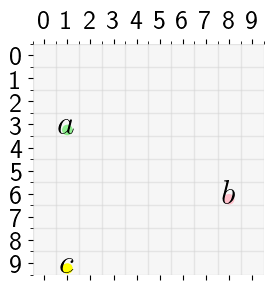

In [175]:
gw = grid_world('custom1', n_danger=6)
model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
# print(model.summary())
# model.load_weights(f'outputs/models/seq_del_p{gw.p}')
env = RL_LTL(gw, model)

In [182]:
gw.mdp.structure

array([['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']], dtype='<U1')

In [3]:
env.train(50, smart_start=True)

##########################
C: 0.5 | tow: 0.2
0 ) MCTS conf: 0.3 , det: 0.61 | s: 69 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('b',) ('c',)]
1 ) MCTS conf: -0.04 , det: 0.99 | s: 42 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',)]
2 ) MCTS conf: 0.04 , det: 0.98 | s: 80 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 100 / 500 = 0.2
3 ) MCTS conf: 0.95 , det: 0.91 | s: 73 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 117 / 500 = 0.234
4 ) MCTS conf: 0.98 , det: 1.0 | s: 56 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 192 / 500 = 0.384
5 ) MCTS conf: 0.52 , det: 0.94 | s: 92 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
Running 500 simulations with 50 time-st

In [163]:
saved_records = env.get_policy(100, reset_tables=False)

0 ) MCTS conf: 1.0 , det: 1.0 | s: 77 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
1 ) MCTS conf: 1.0 , det: 1.0 | s: 42 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
2 ) MCTS conf: 1.0 , det: 1.0 | s: 17 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
3 ) MCTS conf: 1.0 , det: 1.0 | s: 40 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
4 ) MCTS conf: 1.0 , det: 1.0 | s: 87 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
5 ) MCTS conf: -0.42 , det: 1.0 | s: 90 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('c',) ('c',) ('c',) ('c',)]
6 ) MCTS conf: 1.0 , det: 1.0 | s: 16 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
7 ) MCTS conf: 1.0 , det: 1.0 | s: 73 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
8 ) MCTS conf: 1.0 , det: 1.0 | s: 77 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
9 ) MCTS conf: 1.0 , det: 1.0 | s: 32 LTL_f [+++]  LDBA

In [146]:
saved_records[0][1][0]

(0, 0, 5, 2)

In [165]:
class HistoryDataset(Dataset):
    def __init__(self, data, max_length):
        """
        Initialize the dataset with the data and the maximum sequence length.
        Args:
        - data (list): A list containing three lists: state history, action history, and reward history.
        - max_length (int): The maximum length of any episode's state/action/reward sequence.
        """
        self.state_history, self.action_history, self.reward_history = data
        self.max_length = max_length
    
    def __len__(self):
        """
        Return the total number of episodes in the dataset.
        """
        return len(self.state_history)
    
    def __getitem__(self, idx):
        """
        Retrieve the state, action, and reward sequences for the given index,
        apply zero-padding, and create a mask.
        Args:
        - idx (int): Index of the episode to retrieve.
        Returns:
        - A tuple containing:
            - state sequence (Tensor)
            - action sequence (Tensor)
            - reward sequence (Tensor)
            - mask (Tensor)
        """
        states = self.state_history[idx]
        actions = self.action_history[idx]
        rewards = self.reward_history[idx]
        
        # Calculate the actual length of the current episode
        seq_length = max(len(states), len(actions), len(rewards))

        # Create masks where 1s indicate actual data and 0s indicate padding
        mask = [1] * seq_length + [0] * (self.max_length - seq_length)

        # Zero-pad the sequences to the maximum length
        for _ in range((self.max_length - len(states))):
            states.append(states[-1])
        actions.extend([0] * (self.max_length - len(actions)))
        rewards.extend([0] * (self.max_length - len(rewards)))

        print(states)
        
        return torch.tensor(states), torch.tensor(actions), torch.tensor(rewards), torch.tensor(mask)

In [162]:
gw.mdp.label

array([[(), (), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), ('a',), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), ('b',), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), (), (), (), (), (), (), (), (), ()],
       [(), ('c',), (), (), (), (), (), (), (), ()]], dtype=object)

In [131]:
len(saved_records[2][0])

40

In [166]:
dataset = HistoryDataset(copy.deepcopy(saved_records), 50)

# Getting data for the first episode
states, actions, rewards, mask = dataset[0]
print("States:", states, states.shape)
print("Actions:", actions, actions.shape)
print("Rewards:", rewards, rewards.shape)
print("Mask:", mask, mask.shape)

[(0, 0, 1, 7), (0, 0, 1, 6), (0, 0, 1, 5), (0, 0, 1, 4), (0, 0, 1, 3), (0, 0, 1, 2), (0, 0, 1, 1), (0, 0, 2, 1), (0, 0, 3, 1), (0, 1, 4, 1), (0, 1, 4, 0), (0, 1, 5, 0), (0, 1, 6, 0), (0, 1, 7, 0), (0, 1, 8, 0), (0, 1, 8, 1), (0, 1, 8, 2), (0, 1, 8, 3), (0, 1, 8, 4), (0, 1, 8, 5), (0, 1, 7, 5), (0, 1, 6, 5), (0, 1, 6, 6), (0, 1, 7, 6), (0, 1, 7, 7), (0, 1, 7, 8), (0, 1, 6, 8), (0, 2, 6, 7), (0, 2, 6, 6), (0, 2, 6, 5), (0, 2, 7, 5), (0, 4, 7, 5), (0, 5, 7, 4), (0, 5, 6, 4), (0, 5, 6, 3), (0, 5, 6, 2), (0, 5, 6, 1), (0, 5, 7, 1), (0, 5, 7, 0), (0, 5, 8, 0), (0, 5, 9, 0), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1)]


In [167]:
goal_locations = [(3,1), (6,8), (9,1)]

In [168]:
data_to_save = (dataset, goal_locations)

# Save the tuple to a file
with open('my_saved_data.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)
    print("Data has been saved to 'my_saved_data.pkl'")

Data has been saved to 'my_saved_data.pkl'


In [173]:
# The loaded_data contains two items: the dataset object and the list of goal locations: (dataset, goal_locations)
with open('my_saved_data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Extract the dataset from the first element of the tuple
loaded_dataset = loaded_data[0]

# Extract the list of goal locations from the second element of the tuple
# Each item in this list is a tuple representing coordinates (x, y) indicating goal positions.
loaded_goal_locations = loaded_data[1]

# Display the list of goal locations
print("Loaded Goal Locations:", loaded_goal_locations)

# print first item in dataset:
states, actions, rewards, mask = loaded_dataset[0]
print("States:", states, states.shape)
print("Actions:", actions, actions.shape)
print("Rewards:", rewards, rewards.shape)
print("Mask:", mask, mask.shape)

Loaded Goal Locations: [(3, 1), (6, 8), (9, 1)]
[(0, 0, 7, 7), (0, 0, 7, 6), (0, 0, 7, 5), (0, 0, 6, 5), (0, 0, 6, 4), (0, 0, 5, 4), (0, 0, 4, 4), (0, 0, 4, 3), (0, 0, 3, 3), (0, 0, 3, 2), (0, 0, 3, 1), (0, 1, 4, 1), (0, 1, 4, 0), (0, 1, 5, 0), (0, 1, 6, 0), (0, 1, 7, 0), (0, 1, 8, 0), (0, 1, 8, 1), (0, 1, 8, 2), (0, 1, 8, 3), (0, 1, 8, 4), (0, 1, 8, 5), (0, 1, 7, 5), (0, 1, 6, 5), (0, 1, 6, 6), (0, 1, 7, 6), (0, 1, 7, 7), (0, 1, 7, 8), (0, 1, 6, 8), (0, 2, 6, 7), (0, 2, 6, 6), (0, 2, 6, 5), (0, 2, 7, 5), (0, 4, 7, 5), (0, 5, 7, 4), (0, 5, 6, 4), (0, 5, 6, 3), (0, 5, 6, 2), (0, 5, 6, 1), (0, 5, 7, 1), (0, 5, 7, 0), (0, 5, 8, 0), (0, 5, 9, 0), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1), (0, 5, 9, 1)]
States: tensor([[0, 0, 7, 7],
        [0, 0, 7, 6],
        [0, 0, 7, 5],
        [0, 0, 6, 5],
        [0, 0, 6, 4],
        [0, 0, 5, 4],
        [0, 0, 4, 4],
        [0, 0, 4, 3],
        [0, 0, 3, 3],
        [0, 0, 3, 2],
        [0, 0, 3, 1],
 